In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [ ]:
%%writefile get_data.sh
mkdir -p data
if [ ! -f data/cell_phone_churn.csv ]; then
  wget -O data/cell_phone_churn.csv https://www.dropbox.com/scl/fi/qutq3sa7dge9vx133to6o/cell_phone_churn.csv?rlkey=1jpwo0ork58254lzxxy0qz4kf&dl=0
fi
if [ ! -f data/churn_missing.csv ]; then
  wget -O data/churn_missing.csv https://www.dropbox.com/scl/fi/rab18zeo6bq58fz1tadwc/churn_missing.csv?rlkey=32tcp05gaj8rgnpc76vh2dbca&dl=0
fi
if [ ! -f data/iris.data ]; then
  wget -O data/iris.data https://www.dropbox.com/scl/fi/0vpbcxsiesofpknnkz1mo/iris.data?rlkey=8lz6biaoccef8ggvpx4kebrbm&dl=0
fi
if [ ! -f data/NBA_players_2015.csv ]; then
  wget -O data/NBA_players_2015.csv https://www.dropbox.com/scl/fi/0jgo8u5lbphvwwl2btq1w/NBA_players_2015.csv?rlkey=q86m5lp3ycndh5jbegvjewwzu&dl=0
fi
if [ ! -f data/NHL_Data_GA.csv ]; then
  wget -O data/NHL_Data_GA.csv https://www.dropbox.com/scl/fi/lf41hb2tfe212dfqof9w8/NHL_Data_GA.csv?rlkey=jzgi8133t53wk6ybmjay1duig&dl=0
fi



In [ ]:
!bash get_data.sh

In [2]:
df = pd.read_csv('./data/churn_missing.csv')

df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0.0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0.0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0.0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<AxesSubplot:>

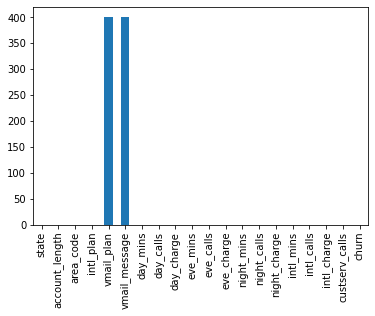

In [3]:
df.isnull().sum().plot(kind='bar')

In [4]:
df.churn.unique()

array([False,  True])

In [5]:
df.vmail_plan.unique()

array(['yes', 'no', nan], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           3333 non-null   object 
 1   account_length  3333 non-null   int64  
 2   area_code       3333 non-null   int64  
 3   intl_plan       3333 non-null   object 
 4   vmail_plan      2933 non-null   object 
 5   vmail_message   2933 non-null   float64
 6   day_mins        3333 non-null   float64
 7   day_calls       3333 non-null   int64  
 8   day_charge      3333 non-null   float64
 9   eve_mins        3333 non-null   float64
 10  eve_calls       3333 non-null   int64  
 11  eve_charge      3333 non-null   float64
 12  night_mins      3333 non-null   float64
 13  night_calls     3333 non-null   int64  
 14  night_charge    3333 non-null   float64
 15  intl_mins       3333 non-null   float64
 16  intl_calls      3333 non-null   int64  
 17  intl_charge     3333 non-null   f

In [7]:
df.vmail_plan.fillna('no',inplace=True)
df.vmail_message.fillna(0,inplace=True)
# df.dropna(inplace=True)


In [8]:
df.shape

(3333, 20)

<AxesSubplot:>

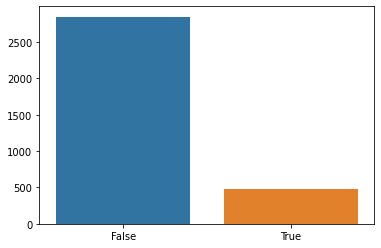

In [9]:
y = df["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

<AxesSubplot:xlabel='state'>

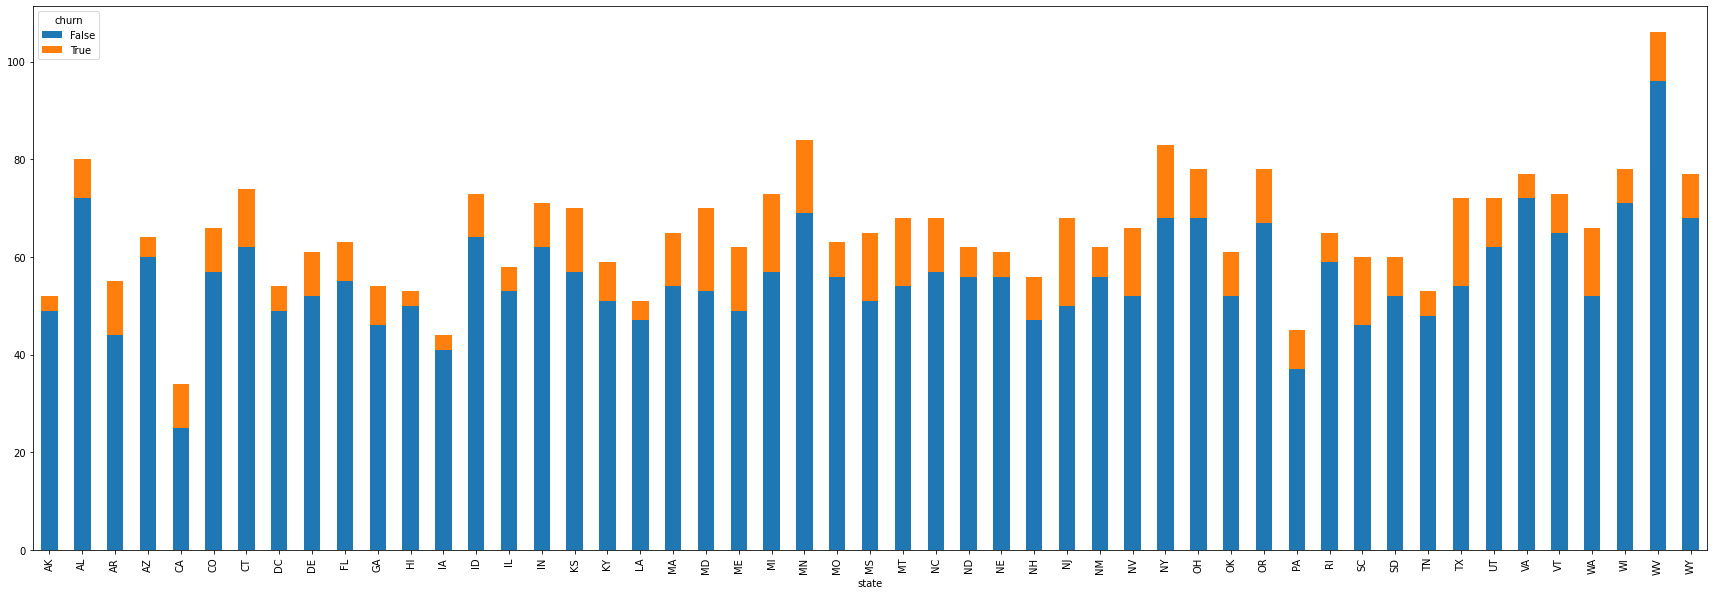

In [10]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 


<AxesSubplot:xlabel='area_code'>

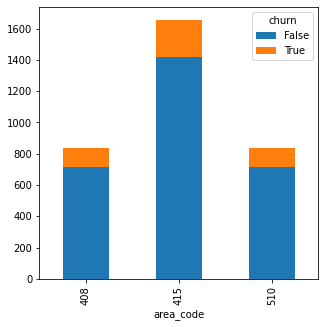

In [11]:
df.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<AxesSubplot:xlabel='intl_plan'>

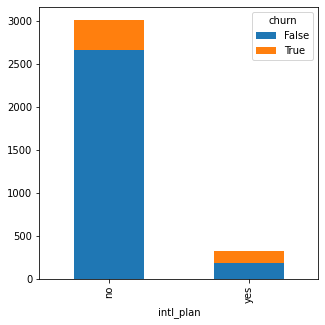

In [12]:
df.groupby(["intl_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [13]:
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0.0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0.0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0.0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
# Discreet value integer encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# State is string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['intl_plan'] = label_encoder.fit_transform(df['intl_plan'])
df['vmail_plan'] = label_encoder.fit_transform(df['vmail_plan'])

#print (df['Voice mail plan'][:4])
#print (df.dtypes)
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,16,128,415,0,1,25.0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26.0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0.0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0.0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0.0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           3333 non-null   int64  
 1   account_length  3333 non-null   int64  
 2   area_code       3333 non-null   int64  
 3   intl_plan       3333 non-null   int64  
 4   vmail_plan      3333 non-null   int64  
 5   vmail_message   3333 non-null   float64
 6   day_mins        3333 non-null   float64
 7   day_calls       3333 non-null   int64  
 8   day_charge      3333 non-null   float64
 9   eve_mins        3333 non-null   float64
 10  eve_calls       3333 non-null   int64  
 11  eve_charge      3333 non-null   float64
 12  night_mins      3333 non-null   float64
 13  night_calls     3333 non-null   int64  
 14  night_charge    3333 non-null   float64
 15  intl_mins       3333 non-null   float64
 16  intl_calls      3333 non-null   int64  
 17  intl_charge     3333 non-null   f

In [16]:
y = df['churn'].astype(np.int)
df.drop(["churn"], axis = 1, inplace=True)
y.size


3333

In [17]:
# df1 = df.drop('state', axis=1).drop('intl_plan', axis=1).drop('area_code', axis=1)
X = df.astype(np.float)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)

In [18]:
X

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls
0,16.0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,35.0,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,31.0,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,35.0,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,36.0,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3.0,192.0,415.0,0.0,1.0,36.0,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0
3329,49.0,68.0,415.0,0.0,0.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0
3330,39.0,28.0,510.0,0.0,0.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0
3331,6.0,184.0,510.0,1.0,0.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0


In [19]:
pd.DataFrame(X).describe()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.240924,7.059706,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,42.371290,0.295879,0.427708,13.074506,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,510.000000,0.000000,0.000000,0.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [21]:
rf_model = RandomForestClassifier(n_estimators=50,max_depth=5)


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [22]:
metrics.confusion_matrix(y_test,y_pred)

array([[586,   5],
       [ 41,  35]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.88      0.46      0.60        76
           0       0.93      0.99      0.96       591

    accuracy                           0.93       667
   macro avg       0.90      0.73      0.78       667
weighted avg       0.93      0.93      0.92       667



In [24]:
len(y[y == 0])/len(y)

0.8550855085508551